In [20]:
#MOCKUPS FOR DATA 0.DPT (100% TiO2)

import pandas as pd
import numpy as np

# Read the .dpt file into a DataFrame
file_path = 'C:/Users/baubl/OneDrive/Stalinis kompiuteris/Machine learning/Pigment/0.dpt'
measured_data = pd.read_csv(file_path, delimiter=',', header=None, names=['wavelength', 'intensity'])

# Calculate mean and standard deviation
mean = measured_data.mean()
std_dev = measured_data.std()

# Number of mockup sets to create
num_mockup_sets = 5
intensity_column = 'intensity'
mockup_data_sets = []

for i in range(num_mockup_sets):
    mockup_data = measured_data.copy()
    if intensity_column in measured_data.columns:
        noise = np.random.normal(0, measured_data[intensity_column].std() * 0.01, size=len(measured_data))
        mockup_data[intensity_column] = measured_data[intensity_column] + noise
    mockup_data_sets.append(mockup_data)

# Displaying one of the mockup data sets for verification
mockup_data_sets[0].head()

# Save mockup data sets to CSV files
mockup_csv_paths = []
for i, mockup_data in enumerate(mockup_data_sets):
    file_path = f'C:/Users/baubl/OneDrive/Dokumentai/GitHub/raman-pigments-model/DATA/mock_{i+1}.csv'
    mockup_data.to_csv(file_path, index=False)
    mockup_csv_paths.append(file_path)

mockup_csv_paths



['C:/Users/baubl/OneDrive/Dokumentai/GitHub/raman-pigments-model/DATA/mock_1.csv',
 'C:/Users/baubl/OneDrive/Dokumentai/GitHub/raman-pigments-model/DATA/mock_2.csv',
 'C:/Users/baubl/OneDrive/Dokumentai/GitHub/raman-pigments-model/DATA/mock_3.csv',
 'C:/Users/baubl/OneDrive/Dokumentai/GitHub/raman-pigments-model/DATA/mock_4.csv',
 'C:/Users/baubl/OneDrive/Dokumentai/GitHub/raman-pigments-model/DATA/mock_5.csv']

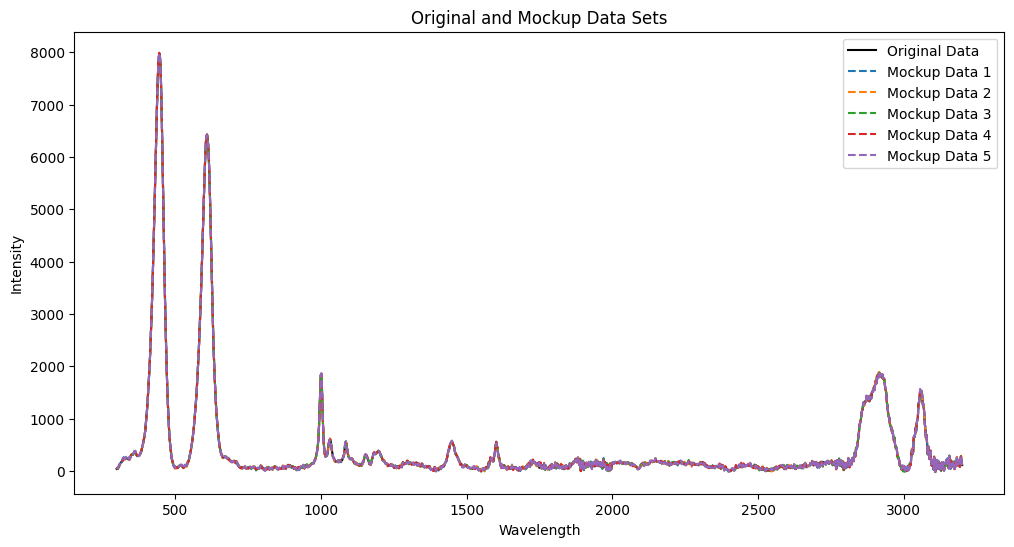

In [10]:
import matplotlib.pyplot as plt

# Plot the original and mockup data sets
plt.figure(figsize=(12, 6))

# Plot the original data
plt.plot(measured_data['wavelength'], measured_data['intensity'], label='Original Data', color='black')

# Plot each mockup data set
for i, mockup_data in enumerate(mockup_data_sets):
    plt.plot(mockup_data['wavelength'], mockup_data['intensity'], label=f'Mockup Data {i+1}', linestyle='--')

# Adding labels and legend
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Original and Mockup Data Sets')
plt.legend()
plt.show()


In [19]:
#MOCKUPS FOR DATA 100.DPT (100% green pigment)

# Read the .dpt file into a DataFrame
file_path = 'C:/Users/baubl/OneDrive/Stalinis kompiuteris/Machine learning/Pigment/100.dpt'
measured_data = pd.read_csv(file_path, delimiter=',', header=None, names=['wavelength', 'intensity'])

# Calculate mean and standard deviation
mean = measured_data.mean()
std_dev = measured_data.std()

# Number of mockup sets to create
num_mockup_sets = 5
intensity_column = 'intensity'
mockup_data_sets = []

for i in range(num_mockup_sets):
    mockup_data = measured_data.copy()
    if intensity_column in measured_data.columns:
        noise = np.random.normal(0, measured_data[intensity_column].std() * 0.01, size=len(measured_data))
        mockup_data[intensity_column] = measured_data[intensity_column] + noise
    mockup_data_sets.append(mockup_data)

# Displaying one of the mockup data sets for verification
mockup_data_sets[0].head()

# Save mockup data sets to CSV files
mockup_csv_paths = []
for i, mockup_data in enumerate(mockup_data_sets):
    file_path = f'C:/Users/baubl/OneDrive/Dokumentai/GitHub/raman-pigments-model/DATA/mock_{i+101}.csv'
    mockup_data.to_csv(file_path, index=False)
    mockup_csv_paths.append(file_path)

mockup_csv_paths

['C:/Users/baubl/OneDrive/Dokumentai/GitHub/raman-pigments-model/DATA/mock_101.csv',
 'C:/Users/baubl/OneDrive/Dokumentai/GitHub/raman-pigments-model/DATA/mock_102.csv',
 'C:/Users/baubl/OneDrive/Dokumentai/GitHub/raman-pigments-model/DATA/mock_103.csv',
 'C:/Users/baubl/OneDrive/Dokumentai/GitHub/raman-pigments-model/DATA/mock_104.csv',
 'C:/Users/baubl/OneDrive/Dokumentai/GitHub/raman-pigments-model/DATA/mock_105.csv']

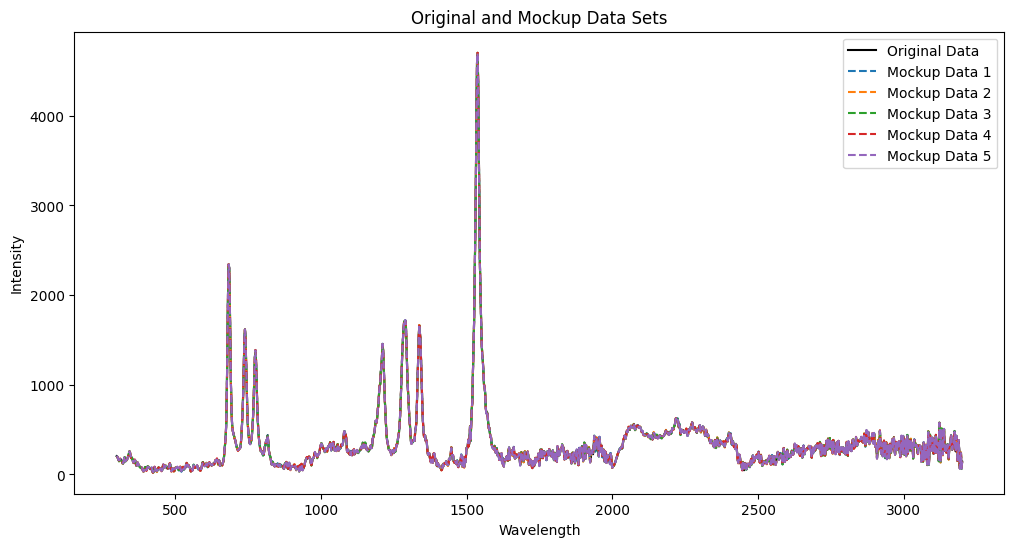

In [13]:
# Plot the original and mockup data sets
plt.figure(figsize=(12, 6))

# Plot the original data
plt.plot(measured_data['wavelength'], measured_data['intensity'], label='Original Data', color='black')

# Plot each mockup data set
for i, mockup_data in enumerate(mockup_data_sets):
    plt.plot(mockup_data['wavelength'], mockup_data['intensity'], label=f'Mockup Data {i+1}', linestyle='--')

# Adding labels and legend
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Original and Mockup Data Sets')
plt.legend()
plt.show()